In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.stattools import adfuller
# from scipy.ndimage.interpolation import shift

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
# Versões dos pacotes usados no notebook

%reload_ext watermark
%watermark -a "César S. Hooper/ Dezembro 2022" --iversions
!python --version

Author: César S. Hooper/ Dezembro 2022

cv2        : 4.5.4-dev
pandas     : 1.2.4
sklearn    : 0.24.1
statsmodels: 0.12.2
matplotlib : 3.3.4
numpy      : 1.19.5

Python 3.8.8


In [97]:
datos = pd.read_excel('ES time frame 30 min 2022 actualizado.xlsx', sheet_name='Hoja2')
datos = datos.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1)

In [296]:
datos.head(20)

,TIME,LSOI Verde,LSOI Rojo,LSOI L,LSOI S,LSOI I,LSOI O,CCI Verde,CCI Rojo,CLOSE,LSOI,CCI 30 MIN,RENTABILIDAD,diff
0,00:00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4768.00,S,-136,0.00,0.00
1,00:30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4768.25,I,-138,0.25,0.25
2,01:00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4770.50,O,-108,2.50,2.25
3,01:30,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4774.25,L,-17,6.25,3.75
4,02:00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4774.75,L,25,6.75,0.50
5,02:30,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4778.75,L,90,10.75,4.00
6,03:00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4779.00,L,108,11.00,0.25
7,03:30,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4778.00,S,84,10.00,-1.00
8,04:00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4783.50,L,169,15.50,5.50
9,04:30,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4783.75,I,172,15.75,0.25


In [98]:
datos = datos.fillna(0)
datos.head(10)
columnas = datos.columns[1:9]
columnas

Index(['LSOI Verde', 'LSOI Rojo', 'LSOI L', 'LSOI  S', 'LSOI  I', 'LSOI  O',
       'CCI  Verde', 'CCI Rojo'],
      dtype='object')

In [102]:
k = 1
lista1 = []
for col in columnas:
    lista1.append(datos[str(col)].sum()/k)
    k += 1
lista1

[3528.0, 3552.0, 2693.0, 2577.0, 1199.0, 755.0, 3756.0, 3426.0]

In [103]:
# reemplaza por 1 las opciones coloreadas
k = 1
for col in columnas:
    datos[str(col)] = datos[str(col)].replace(k, 1)
    k += 1

In [109]:
k = 1
lista2 = []
for col in columnas:
    lista2.append(datos[str(col)].sum())
    k += 1
if(lista2 == lista1): print('Listas Iguales')

Listas Iguales


In [264]:
diff1 = datos['CLOSE'].diff().fillna(0)
datos['diff'] = diff1

In [265]:
diff1.head(10)

0    0.00
1    0.25
2    2.25
3    3.75
4    0.50
5    4.00
6    0.25
7   -1.00
8    5.50
9    0.25
Name: CLOSE, dtype: float64

<AxesSubplot:>

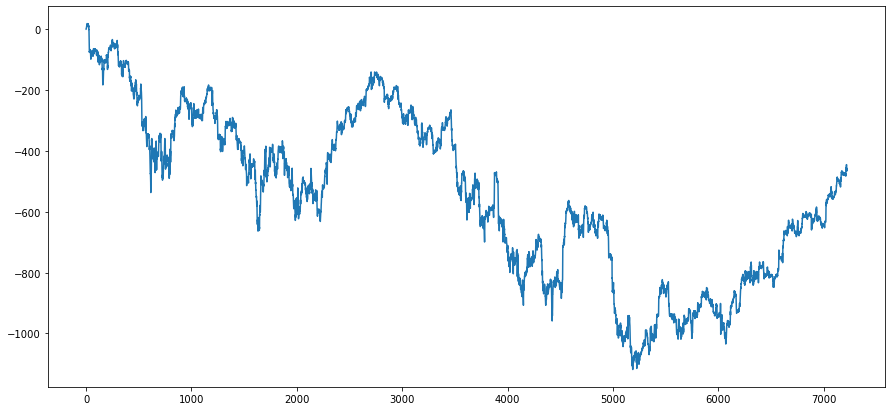

In [303]:
diff = diff1.copy()
datos['RENTABILIDAD'].plot(figsize=(15,7))

In [293]:
# transforma a 0 y 1 los diffs
for ind in diff.index:
    if (diff[ind]>0): 
        diff[ind] = 1
    elif (diff[ind]<0):
        diff[ind] = -1
    else:
        diff[ind] = 0


<AxesSubplot:>

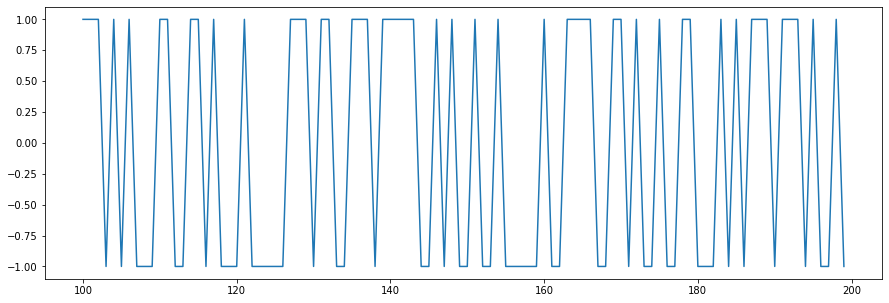

In [294]:
diff[100:200].plot(figsize=(15,5))

In [268]:
# 'CRITERIO' para seleccionar regiones 
# si diff[k] == diff[k+1] == diff[k+2] -> bueno
# si ! -> malo
# diff2 = pd.Series()

for k in diff.index[0:-3]:
    if (len(diff[k:k+3].unique()) == 1):
        diff.loc[k] = 1
    else: diff.loc[k] = 0
        
diff2 = pd.Series(diff)
diff2.head(10)

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
5    0.0
6    0.0
7    0.0
8    1.0
9    0.0
Name: CLOSE, dtype: float64

<AxesSubplot:>

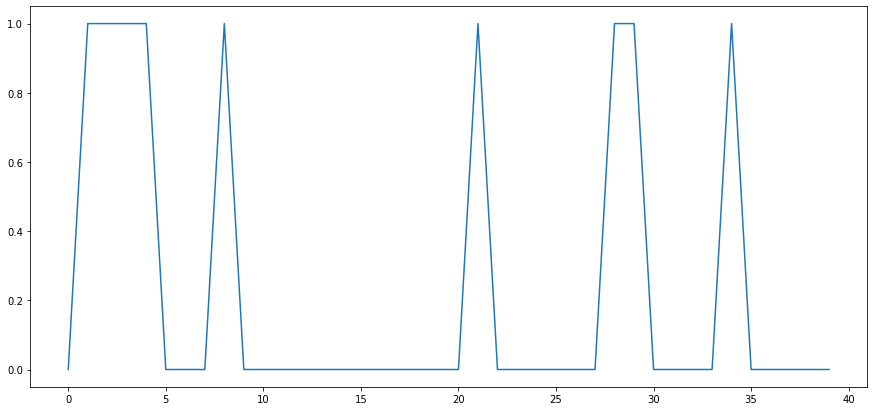

In [271]:
diff2[0:40].plot(figsize=(15,7))